# Health Care Analysis and Prediction 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [3]:
df=pd.read_csv("F:\health care project\Sleep_health_and_lifestyle_dataset.csv")
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [4]:
df.select_dtypes(include='object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [5]:
df.drop(columns='Person ID',inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df[['Blood Pressure 1','Blood Pressure 2']]=df['Blood Pressure'].str.split('/',expand=True)
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,120,80
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,120,80
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,120,80


In [7]:
df.drop(columns='Blood Pressure',inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [8]:
#checking the BMI category unique value#
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [9]:
df['BMI Category']=df['BMI Category'].replace('Normal Weight','Normal')
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [10]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

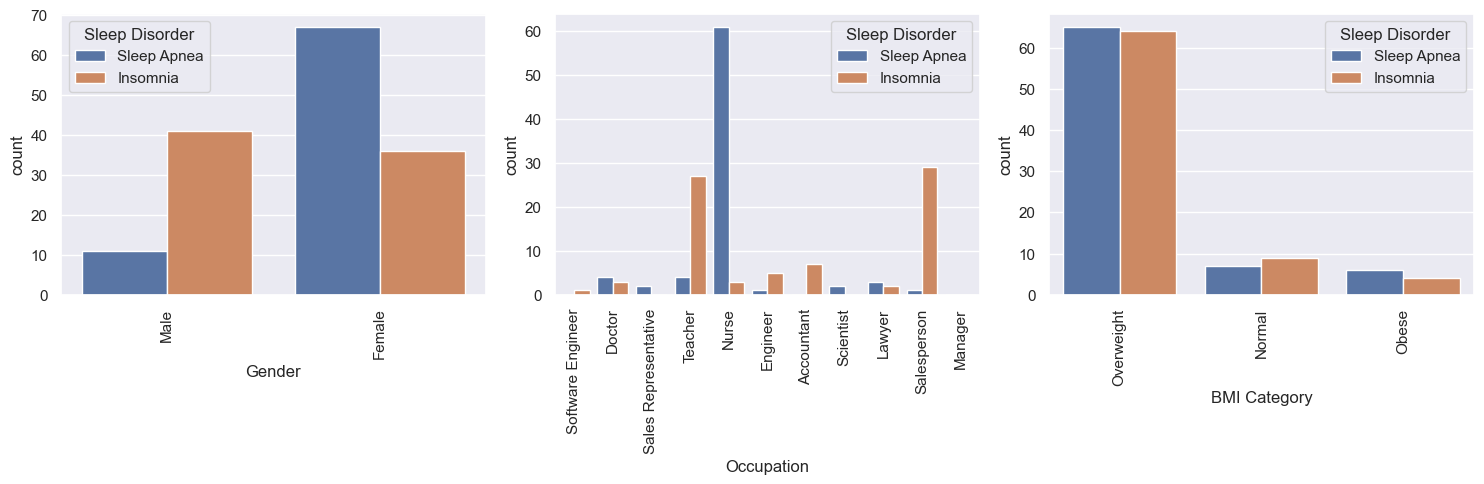

In [11]:
#list of categorical variables to plot#
cat_vars=['Gender','Occupation','BMI Category']
#create figures with subplots
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
axs=axs.flatten()
#create a bar plot for each categorical variable
for i,var in enumerate(cat_vars):
    sns.countplot(x=var,hue='Sleep Disorder',data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    #adjust fitting between subplots
fig.tight_layout()
plt.show()
    

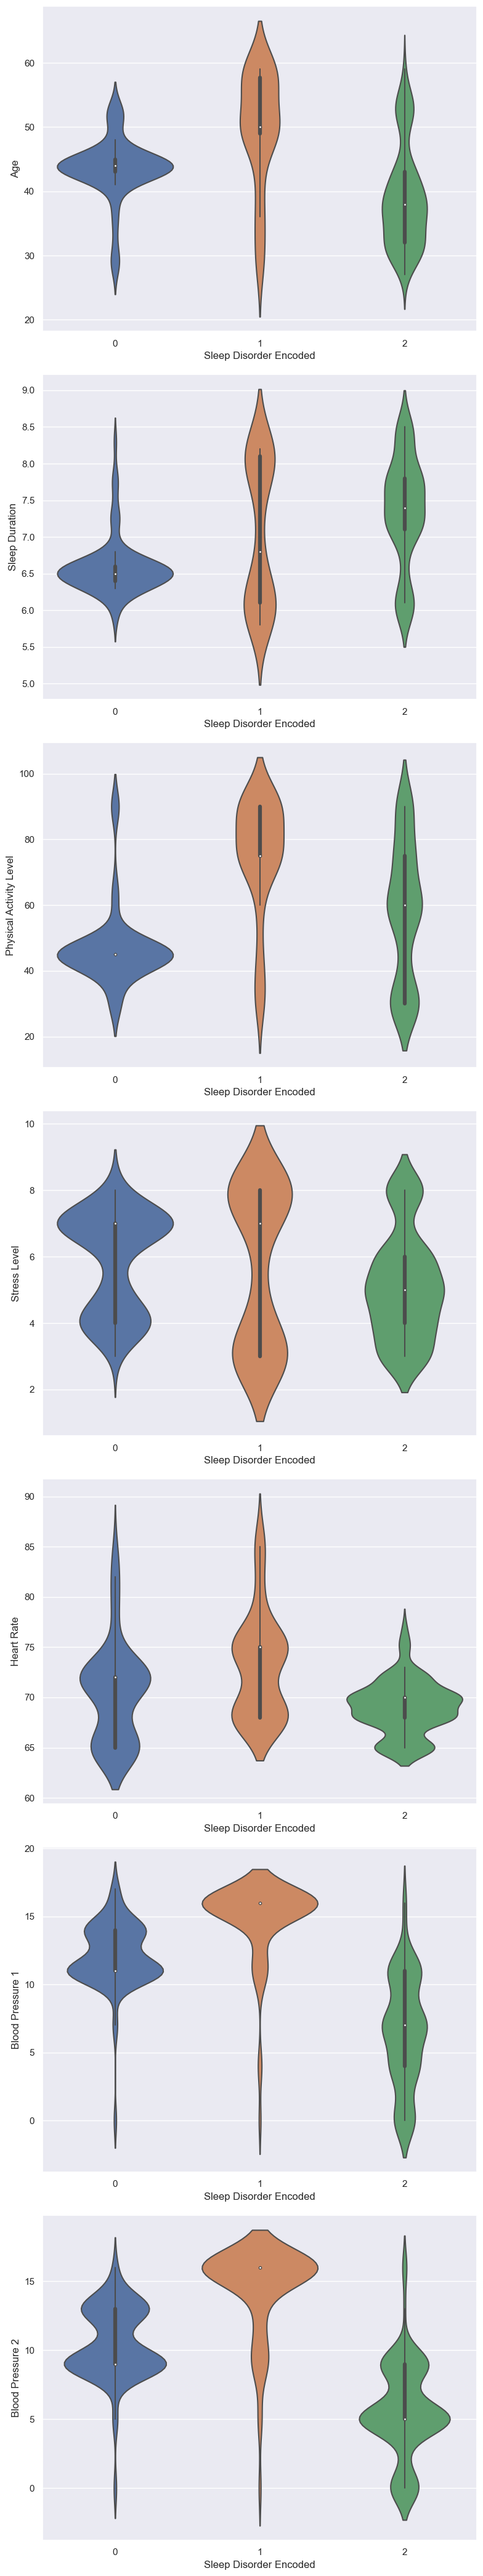

In [45]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'Sleep Disorder' is a categorical column
label_encoder = LabelEncoder()
df['Sleep Disorder Encoded'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Rest of your code to create violin plots
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(num_vars), figsize=(8, 6 * len(num_vars)))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Sleep Disorder Encoded', ax=axs[i])

fig.tight_layout()
plt.show()


In [15]:
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Sleep Disorder    58.55615
dtype: float64

In [16]:
#loop over each columnin the dataframe
for col in df.select_dtypes(include=['object']).columns:
    #print the column name and the unique values
    print(f"{col}:{df[col].unique()}")

Gender:['Male' 'Female']
Occupation:['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category:['Overweight' 'Normal' 'Obese']
Sleep Disorder:[nan 'Sleep Apnea' 'Insomnia']
Blood Pressure 1:['126' '125' '140' '120' '132' '130' '117' '118' '128' '131' '115' '135'
 '129' '119' '121' '122' '142' '139']
Blood Pressure 2:['83' '80' '90' '87' '86' '76' '85' '84' '75' '88' '78' '77' '79' '82'
 '92' '95' '91']


In [18]:
import pandas as pd
from sklearn import preprocessing

# Your DataFrame creation and other code here...

# Rest of the code for label encoding...

from sklearn.preprocessing import LabelEncoder
#loop over each column in the dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Occupation: [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category: [2 0 1]
Sleep Disorder: [2 1 0]
Blood Pressure 1: [ 8  7 16  4 13 11  1  2  9 12  0 14 10  3  5  6 17 15]
Blood Pressure 2: [ 7  5 13 11 10  1  9  8  0 12  3  2  4  6 15 16 14]


<Axes: >

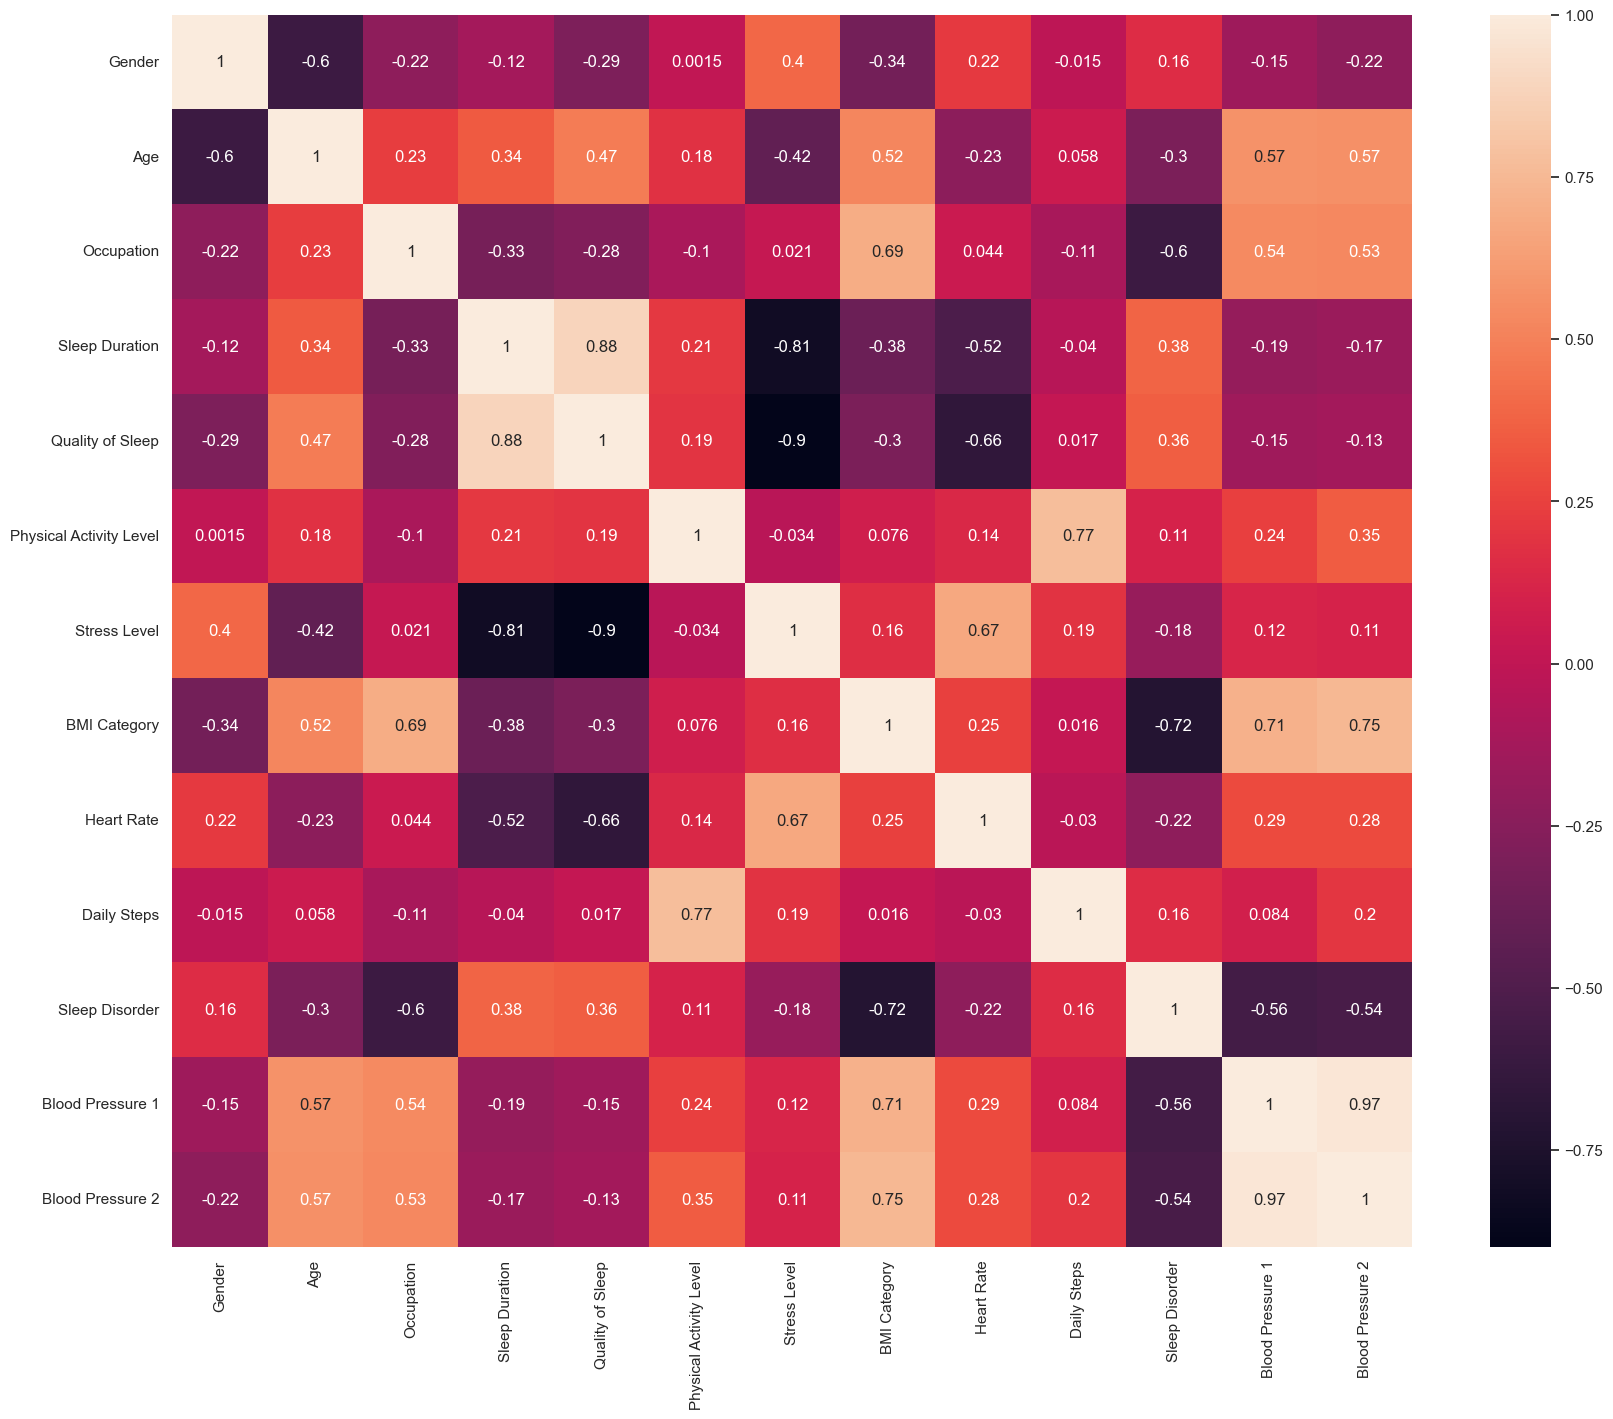

In [19]:
#correlation heatmap
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [20]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
#select the features of x and target values y
X=df.drop('Sleep Disorder',axis=1)
y=df['Sleep Disorder']
#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
from scipy import stats
selected_columns=['Heart Rate']
#calculate the z-scores for selected columns
z_scores=np.abs(stats.zscore(X_train[selected_columns]))
#set a threshold value for outlier detection
threshold=3
#find the indices of outliers detection on threshold
outlier_indices = np.array([108, 115, 147, 165, 288])
#remove the outliers from training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
#perform a grid search with cross-validation to find best hyper paramenters
grid_search=GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(X_train,y_train)
#print the best hyper parameters
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0,max_depth=4,min_samples_leaf=1,min_samples_split=2,class_weight='balanced')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

In [24]:
from sklearn.metrics import accuracy_score
y_pred=dtree.predict(X_test)
print("accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score: 86.67 %


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

# Assuming y_test and y_pred are defined elsewhere
print('recall score:', recall_score(y_test, y_pred, average='micro'))
print('precision Score:', precision_score(y_test, y_pred, average='micro'))
print('F-1 Score:', f1_score(y_test, y_pred, average='micro'))
print('Jaccard Score:',(jaccard_score(y_test,y_test,average='micro')))



recall score: 0.8666666666666667
precision Score: 0.8666666666666667
F-1 Score: 0.8666666666666667
Jaccard Score: 1.0


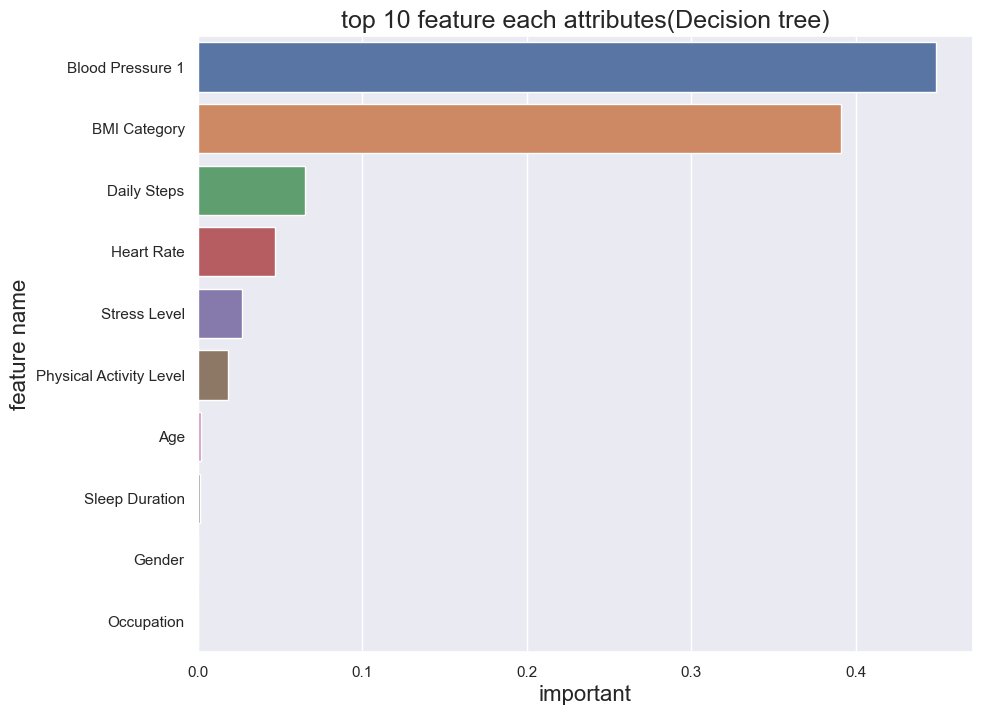

In [28]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Important":dtree.feature_importances_

})
fi=imp_df.sort_values(by="Important",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x="Important",y="Feature Name")
plt.title("top 10 feature each attributes(Decision tree)",fontsize=18)
plt.xlabel("important",fontsize=16)
plt.ylabel("feature name",fontsize=16)
plt.show()


In [30]:
pip install shap



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
    --------------------------------------- 10.2/448.0 kB ? eta -:--:--
   -- ------------------------------------ 30.7/448.0 kB 325.1 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/448.0 kB 279.3 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/448.0 kB 279.3 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/448.0 kB 297.7 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/448.0 kB 297.7 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/448.0 kB 217.9 kB/s eta 0:00:02
   -------- ------------------------------ 92.2/448.0 kB 261.7 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/448.0 kB 288.1 kB/s eta 0:00:02
   ------------- ------------------------ 153.6/448.0 kB 327.3 kB/s eta 0:00:01
   -------------- ----------------------- 174.1/448.0 kB 337.8 kB/s eta 0:00:01
   ---------------- --------------------- 194.6/448.0 kB

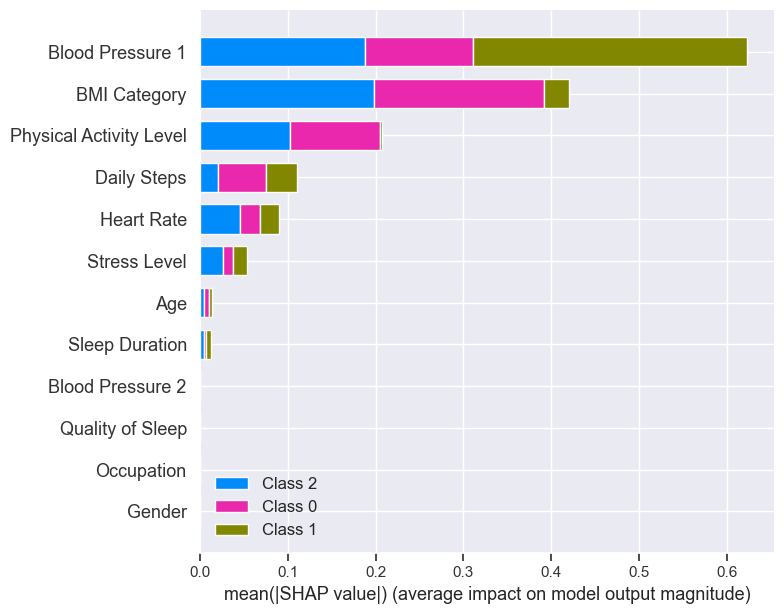

In [31]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

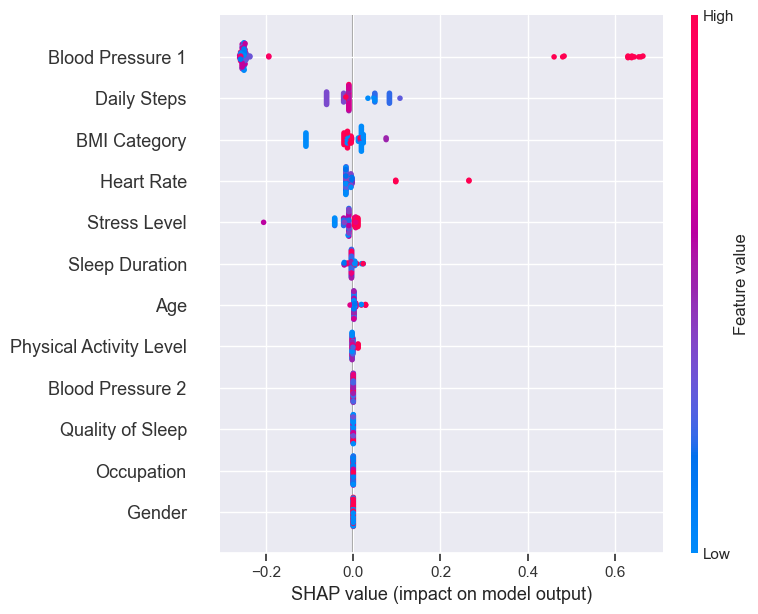

In [33]:
#compute SHAP values
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)

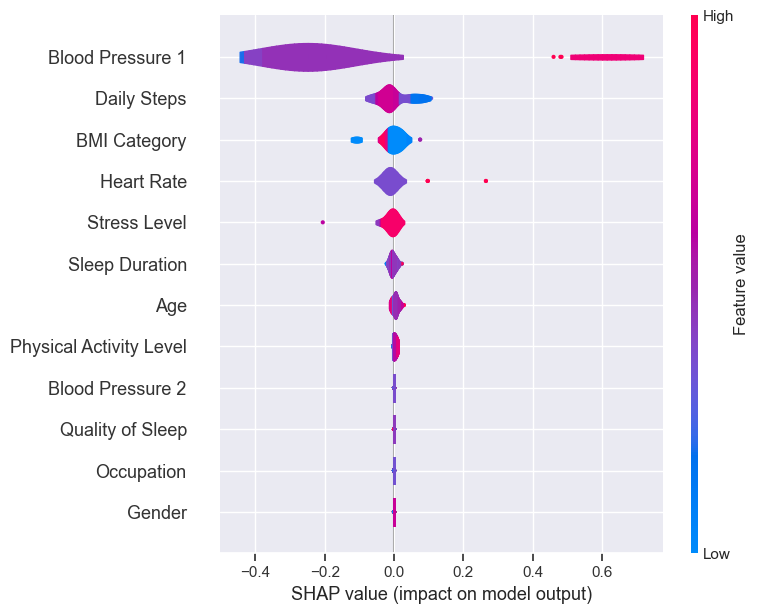

In [34]:
#compute SHAP values
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns,plot_type="violin")

Text(0.5, 1.0, 'accuracy score for decision tree:0.8666666666666667')

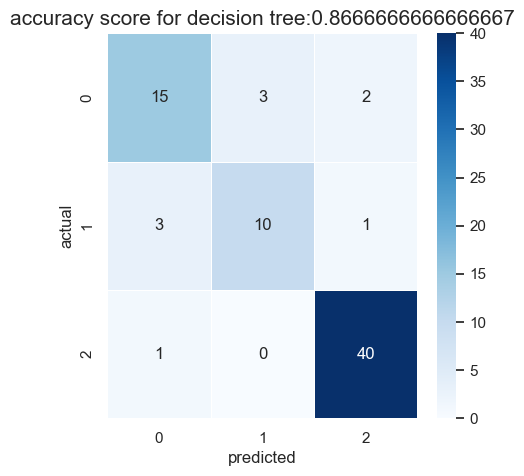

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=.5,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
all_sample_title="accuracy score for decision tree:{0}".format(dtree.score(X_test,y_test))
plt.title(all_sample_title,size=15)

# Random Forest


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(class_weight="balanced")
param_grid={
    "n_estimators":[100,200],
    "max_depth":[None,5,10],
    "max_features":["sqrt","log2",None],
    "random_state":[0,42]
}
#perform grid search with cross validation
grid_search=GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0,max_features="sqrt",n_estimators=100,max_depth=5,class_weight="balanced")
rfc.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [39]:
y_pred=rfc.predict(X_test)
print("accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score: 86.67 %


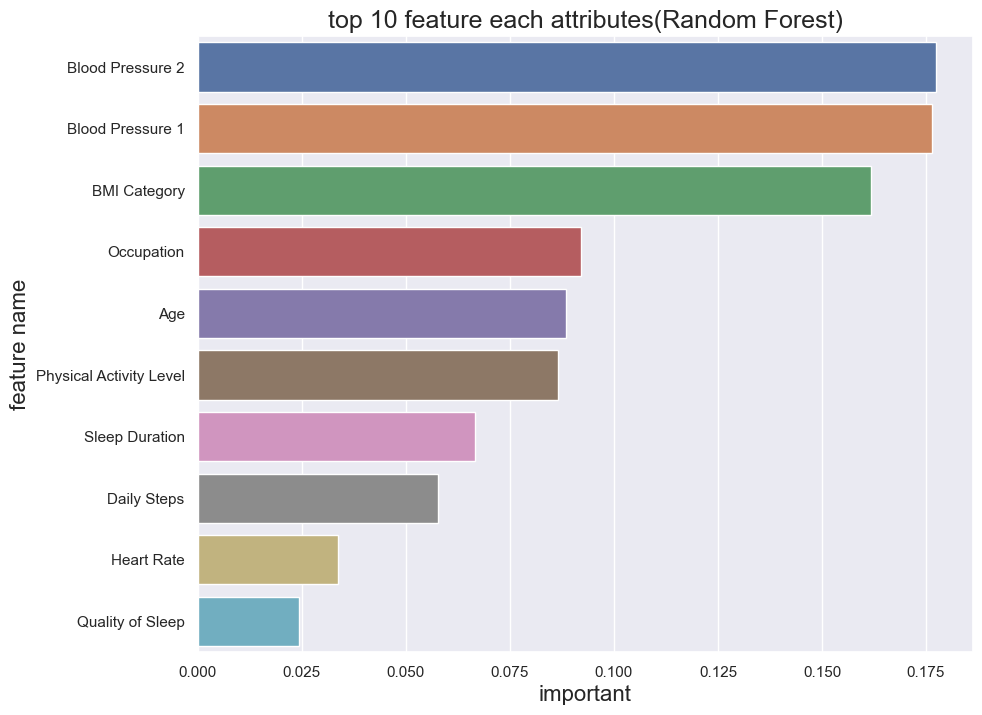

In [40]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Important":rfc.feature_importances_

})
fi=imp_df.sort_values(by="Important",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x="Important",y="Feature Name")
plt.title("top 10 feature each attributes(Random Forest)",fontsize=18)
plt.xlabel("important",fontsize=16)
plt.ylabel("feature name",fontsize=16)
plt.show()

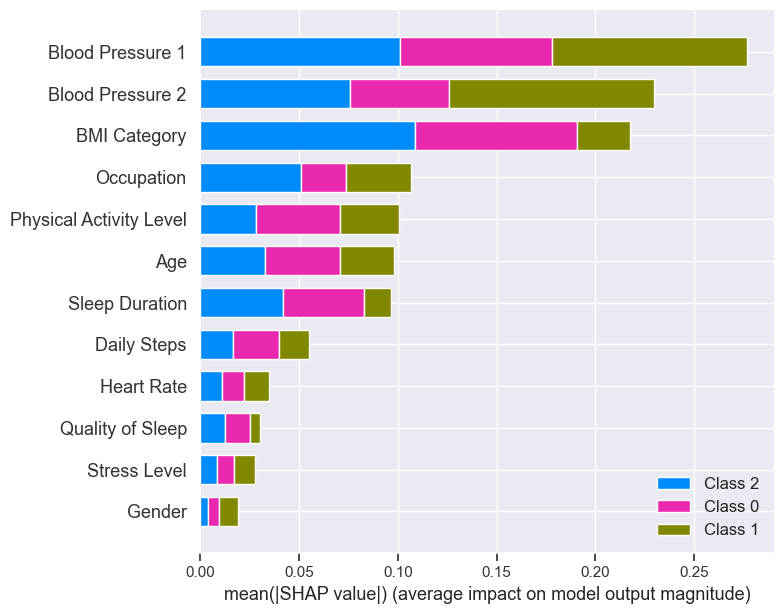

In [41]:
import shap
explainer=shap.TreeExplainer(rfc)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

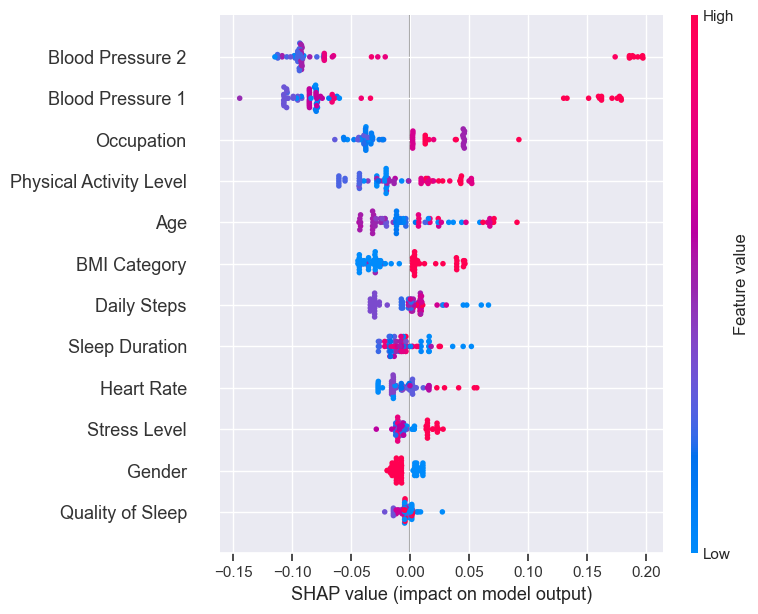

In [42]:
#compute SHAP values
explainer=shap.TreeExplainer(rfc)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)

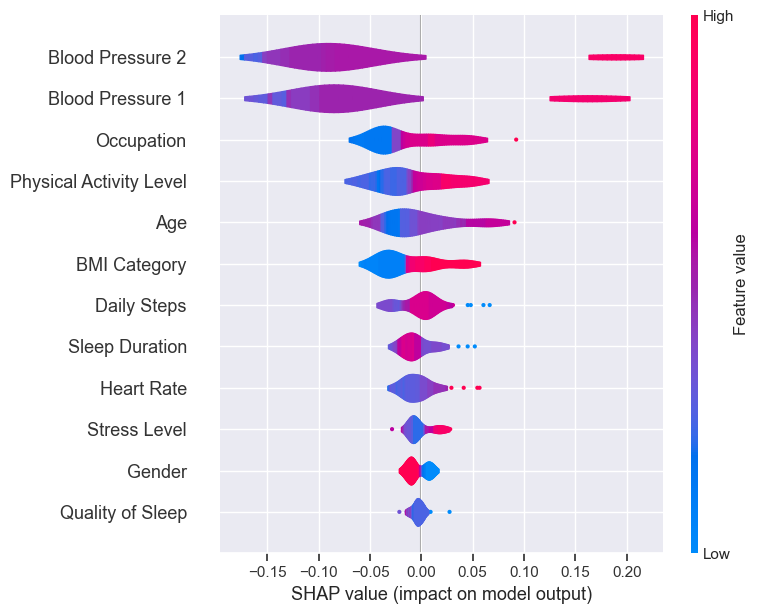

In [43]:
#compute SHAP values
explainer=shap.TreeExplainer(rfc)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns,plot_type="violin")

Text(0.5, 1.0, 'accuracy score for decision tree:0.8666666666666667')

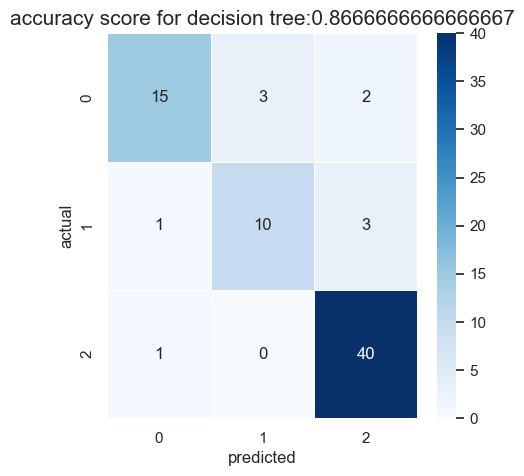

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=.5,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
all_sample_title="accuracy score for decision tree:{0}".format(dtree.score(X_test,y_test))
plt.title(all_sample_title,size=15)